# Source configuration with positional disturbance

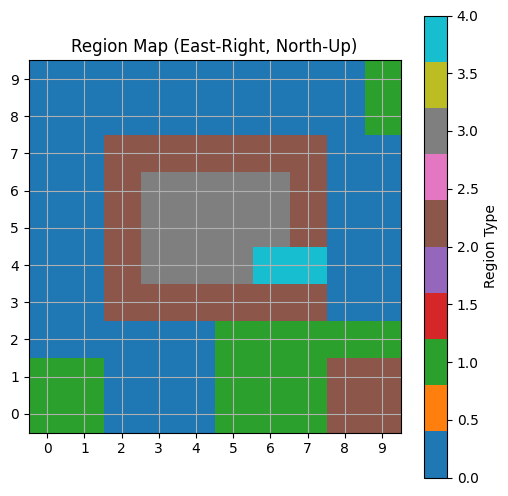

Generating source field 1/10...
✅ 完成：10组源场已生成并保存到 'output_sources/' 文件夹。


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

np.random.seed(42)

region_map = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 2, 2, 2, 2, 2, 2, 0, 0],
    [0, 0, 2, 3, 3, 3, 3, 2, 0, 0],
    [0, 0, 2, 3, 3, 3, 3, 2, 0, 0],
    [0, 0, 2, 3, 3, 3, 4, 4, 0, 0],
    [0, 0, 2, 2, 2, 2, 2, 2, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
    [1, 1, 0, 0, 0, 1, 1, 1, 2, 2],
    [1, 1, 0, 0, 0, 1, 1, 1, 2, 2]
])

# Add the strong localized sources
source = np.zeros_like(region_map, dtype=np.float32)
source[2, 6] = 300
source[4, 2] = 400

# Simulation parameters
N = 10  # The number of blocks per side
L = 40000  # Total length in meters
dx = L // N  # Size of each block in meters
img_size = L  # Output size: 40000 x 40000
output_dir = "output_sources"
os.makedirs(output_dir, exist_ok=True)

plt.figure(figsize=(6, 6))
plt.imshow(region_map[::-1], cmap='tab10', origin='lower')
plt.title("Region Map (East-Right, North-Up)")
plt.colorbar(label="Region Type")
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.grid(True)
plt.show()

# Generate many sets of data
for run in range(1, 2):
    print(f"Generating source field {run}/10...")
    field = np.zeros((img_size, img_size), dtype=np.float32)

    for j in range(N):  # row → North
        for i in range(N):  # column → East
            t = region_map[N - j - 1, i]  # Note: y-axis is from bottom to top
            big_src = source[N - j - 1, i]
            x0 = i * dx
            y0 = j * dx

            if t == 1:  #  Farmland: every 20m a source, uniform, total strength 38
                grid = 20
                n_sub = dx // grid
                val = 38.0 / (n_sub * n_sub)  # Strength of each source point
                for a in range(n_sub):
                    for b in range(n_sub):
                        rx = np.random.randint(0, grid)
                        ry = np.random.randint(0, grid)
                        xx = x0 + a * grid + rx
                        yy = y0 + b * grid + ry
                        field[yy, xx] += val

            elif t == 4:  # Forest: every 20m a source, uniform, total strength 15
                grid = 20
                n_sub = dx // grid
                val = 15.0 / (n_sub * n_sub)
                for a in range(n_sub):
                    for b in range(n_sub):
                        rx = np.random.randint(0, grid)
                        ry = np.random.randint(0, grid)
                        xx = x0 + a * grid + rx
                        yy = y0 + b * grid + ry
                        field[yy, xx] += val


            elif t == 3:  # City: lognormal sources every 100m, σ=1.5, total strength 24
                grid = 400
                n_sub = dx // grid  # 40 × 40
                sigma = 1.5
                samples = np.random.lognormal(mean=0, sigma=sigma, size=(n_sub, n_sub))
                samples *= 24.0 / np.sum(samples)  # 归一化
                for a in range(n_sub):
                    for b in range(n_sub):
                        rx = np.random.randint(0, grid)
                        ry = np.random.randint(0, grid)
                        xx = x0 + a * grid + rx
                        yy = y0 + b * grid + ry
                        field[yy, xx] += samples[b, a]

            elif t == 2:  # Town: lognormal sources every 100m, σ=1.0, total strength 16
                grid = 400
                n_sub = dx // grid
                sigma = 1.0
                samples = np.random.lognormal(mean=0, sigma=sigma, size=(n_sub, n_sub))
                samples *= 16.0 / np.sum(samples)
                for a in range(n_sub):
                    for b in range(n_sub):
                        rx = np.random.randint(0, grid)
                        ry = np.random.randint(0, grid)
                        xx = x0 + a * grid + rx
                        yy = y0 + b * grid + ry
                        field[yy, xx] += samples[b, a]

            # Large localized source
            if big_src > 0:
                # Randomly select a 100m x 100m area within the block
                bx = np.random.randint(0, dx - 100)
                by = np.random.randint(0, dx - 100)
                block_x = x0 + bx
                block_y = y0 + by
                block_val = big_src / (100 * 100)
                field[block_y:block_y+100, block_x:block_x+100] += block_val

    out_path = os.path.join(output_dir, f"sources_{run}.npy")
    np.save(out_path, field)

print("Finish")

# Source configuration without positional disturbance

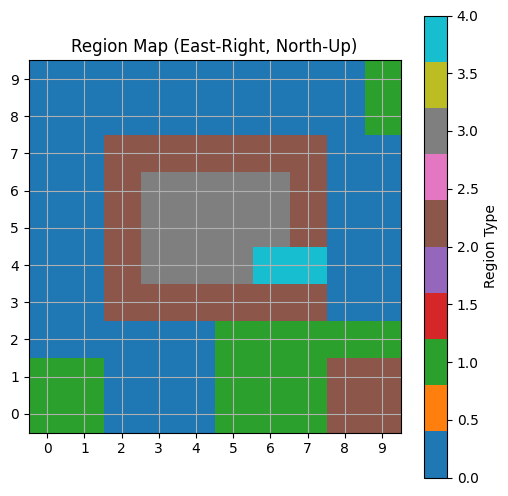

Generating source field 1/10...
✅ 完成：10组源场已生成并保存到 'output_sources/' 文件夹。


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

np.random.seed(42)

region_map = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 2, 2, 2, 2, 2, 2, 0, 0],
    [0, 0, 2, 3, 3, 3, 3, 2, 0, 0],
    [0, 0, 2, 3, 3, 3, 3, 2, 0, 0],
    [0, 0, 2, 3, 3, 3, 4, 4, 0, 0],
    [0, 0, 2, 2, 2, 2, 2, 2, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
    [1, 1, 0, 0, 0, 1, 1, 1, 2, 2],
    [1, 1, 0, 0, 0, 1, 1, 1, 2, 2]
])

# Add the strong localized sources
source = np.zeros_like(region_map, dtype=np.float32)
source[2, 6] = 300
source[4, 2] = 400

# Simulation parameters
N = 10  # The number of blocks per side
L = 40000  # Total length in meters
dx = L // N  # Size of each block in meters
img_size = L  # Output size: 40000 x 40000
output_dir = "output_sources"
os.makedirs(output_dir, exist_ok=True)

plt.figure(figsize=(6, 6))
plt.imshow(region_map[::-1], cmap='tab10', origin='lower')
plt.title("Region Map (East-Right, North-Up)")
plt.colorbar(label="Region Type")
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.grid(True)
plt.show()

# Generate many sets of data
for run in range(1, 2):
    print(f"Generating source field {run}/10...")
    field = np.zeros((img_size, img_size), dtype=np.float32)

    for j in range(N):  # row → North
        for i in range(N):  # column → East
            t = region_map[N - j - 1, i]  # Note: y-axis is from bottom to top
            big_src = source[N - j - 1, i]
            x0 = i * dx
            y0 = j * dx

            if t == 1:  # Agriculture: uniform sources every 20m, total strength 38
                grid = 20
                n_sub = dx // grid
                val = 38.0 / (n_sub * n_sub)  # Strength of each source point
                for a in range(n_sub):
                    for b in range(n_sub):
                        xx = x0 + a * grid + grid // 2
                        yy = y0 + b * grid + grid // 2
                        field[yy, xx] += val

            elif t == 4:  # Lake: uniform sources every 20m, total strength 15
                grid = 20
                n_sub = dx // grid
                val = 15.0 / (n_sub * n_sub)
                for a in range(n_sub):
                    for b in range(n_sub):
                        xx = x0 + a * grid + grid // 2
                        yy = y0 + b * grid + grid // 2
                        field[yy, xx] += val


            elif t == 3:  # City: lognormal sources every 100m, σ=1.5, total strength 24
                grid = 100
                n_sub = dx // grid
                sigma = 1.5
                samples = np.random.lognormal(mean=0, sigma=sigma, size=(n_sub, n_sub))
                samples *= 24.0 / np.sum(samples)  # Normalization
                for a in range(n_sub):
                    for b in range(n_sub):
                        rx = np.random.randint(0, grid)
                        ry = np.random.randint(0, grid)
                        xx = x0 + a * grid + rx
                        yy = y0 + b * grid + ry
                        field[yy, xx] += samples[b, a]

            elif t == 2:  # Town: lognormal sources every 100m, σ=1.0, total strength 16
                grid = 100
                n_sub = dx // grid
                sigma = 1.0
                samples = np.random.lognormal(mean=0, sigma=sigma, size=(n_sub, n_sub))
                samples *= 16.0 / np.sum(samples)
                for a in range(n_sub):
                    for b in range(n_sub):
                        rx = np.random.randint(0, grid)
                        ry = np.random.randint(0, grid)
                        xx = x0 + a * grid + rx
                        yy = y0 + b * grid + ry
                        field[yy, xx] += samples[b, a]

            # Large localized source
            if big_src > 0:
                # Randomly select a 100m x 100m area within the block
                bx = np.random.randint(0, dx - 100)
                by = np.random.randint(0, dx - 100)
                block_x = x0 + bx
                block_y = y0 + by
                block_val = big_src / (100 * 100)
                field[block_y:block_y+100, block_x:block_x+100] += block_val

    out_path = os.path.join(output_dir, f"sources_{run}.npy")
    np.save(out_path, field)

print("Finish")